# Import Library and Dataset

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})

## Preview of data

In [67]:
data = pd.read_csv('Linear Acceleration.csv')
data = data.loc[data['Time (s)'] <= 60]
data.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.033947,-0.008722,0.034713,0.163352
1,0.049725,0.037483,0.033294,0.115609
2,0.065533,0.044210,0.019223,0.065524
3,0.081372,0.018830,0.011739,0.051250
4,0.097210,-0.005073,-0.006908,0.053485


# Direct Method

## Ploting Every Axis

Text(0.5, 1.0, 'X Axis')

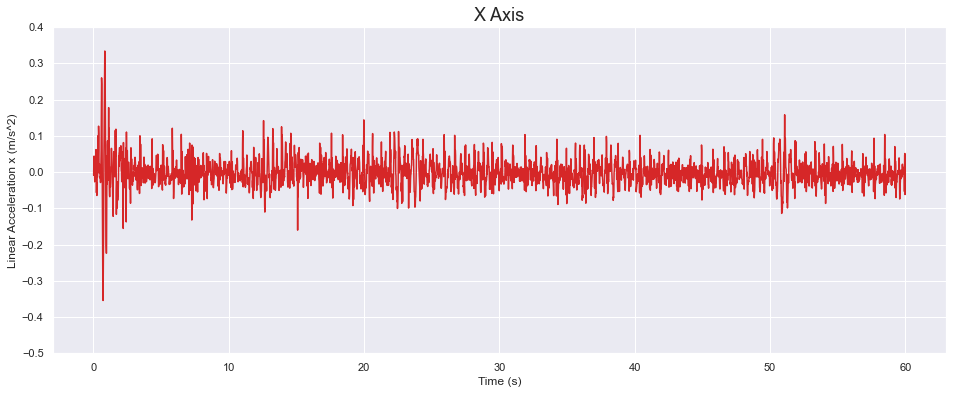

In [177]:
sns.lineplot(x=data['Time (s)'],y=data['Linear Acceleration x (m/s^2)'],color='tab:red')
plt.yticks(np.arange(-0.5,0.5,0.1))
plt.title("X Axis", size=18)

Text(0.5, 1.0, 'Y Axis')

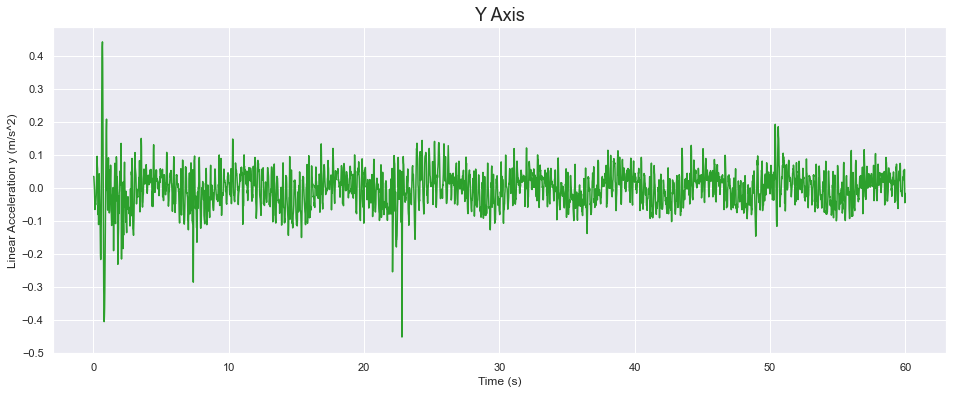

In [176]:
sns.lineplot(x=data['Time (s)'],y=data['Linear Acceleration y (m/s^2)'],color='tab:green')
plt.yticks(np.arange(-0.5,0.5,0.1))
plt.title("Y Axis", size=18)

Text(0.5, 1.0, 'Z Axis')

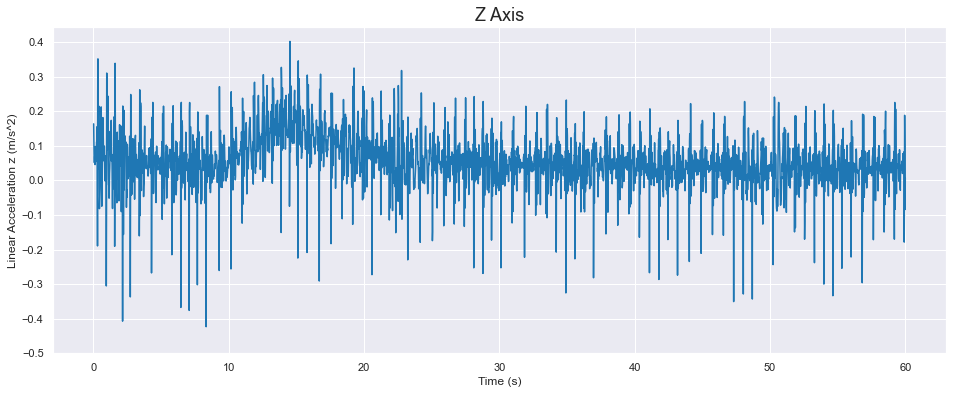

In [178]:
sns.lineplot(x=data['Time (s)'],y=data['Linear Acceleration z (m/s^2)'],color='tab:blue')
plt.yticks(np.arange(-0.5,0.5,0.1))
plt.title("Z Axis", size=18)

## Me-nol-kan sinyal pada sumbu Y sehingga semua sinyal mempunyai starting point sumbu Y yang sama (Ax,Ay,Az adalah data / sinyal dari accelerometer)


In [71]:
Az = data['Linear Acceleration z (m/s^2)']
Ax = data['Linear Acceleration x (m/s^2)']
Ay = data['Linear Acceleration y (m/s^2)']

Az=Az-(np.sum(Az)/len(Az))
Ay=Ay-(np.sum(Ay)/len(Ay))
Ax=Ax-(np.sum(Ax)/len(Ax))

No handles with labels found to put in legend.


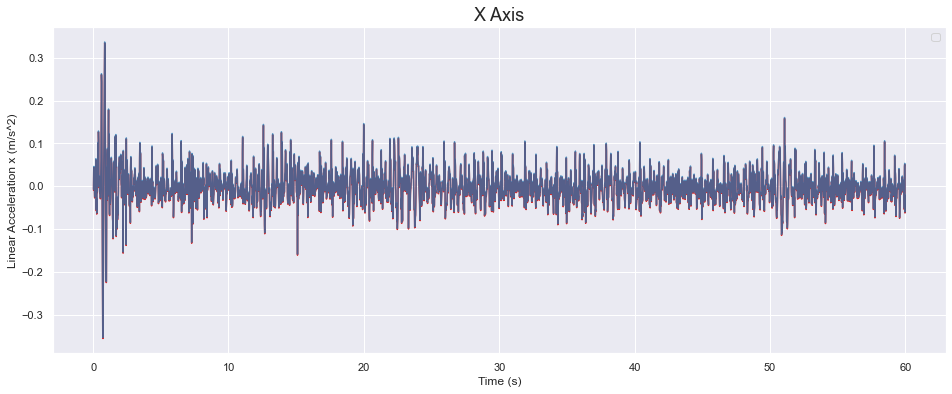

In [72]:
sns.lineplot(x=data['Time (s)'],y=data['Linear Acceleration x (m/s^2)'],color='tab:red')
sns.lineplot(x=data['Time (s)'],y=Ax,color='tab:blue',alpha=0.7)
plt.title("X Axis", size=18)
plt.legend()

No handles with labels found to put in legend.


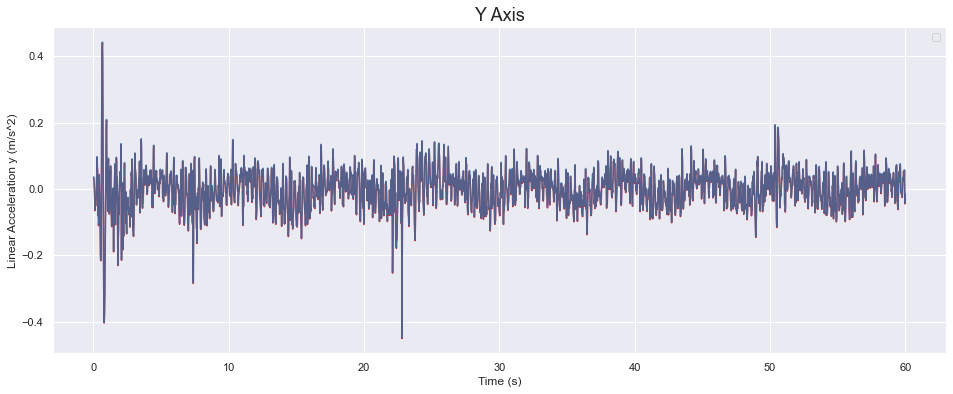

In [73]:
sns.lineplot(x=data['Time (s)'],y=data['Linear Acceleration y (m/s^2)'],color='tab:red')
sns.lineplot(x=data['Time (s)'],y=Ay,color='tab:blue', alpha=0.7)
plt.title("Y Axis", size=18)
plt.legend()

No handles with labels found to put in legend.


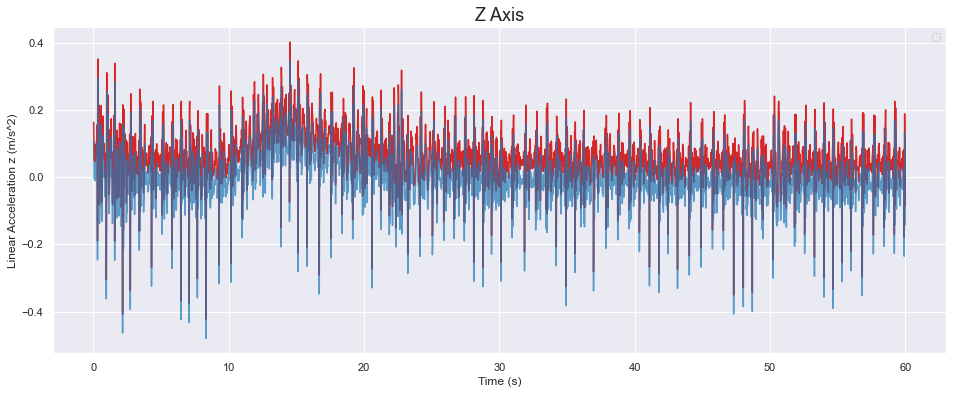

In [74]:
sns.lineplot(x=data['Time (s)'],y=data['Linear Acceleration z (m/s^2)'],color='tab:red')
sns.lineplot(x=data['Time (s)'],y=Az,color='tab:blue',alpha=0.7)
plt.title("Z Axis", size=18)
plt.legend()

# Metode Inklinasi

In [148]:
ArctYZ = np.arctan2(data['Linear Acceleration y (m/s^2)'],data['Linear Acceleration z (m/s^2)']) * 180 / np.pi

No handles with labels found to put in legend.


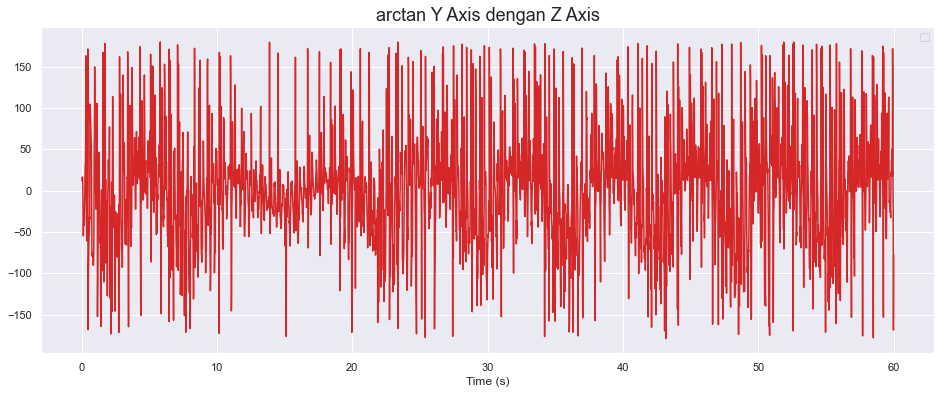

In [94]:
sns.lineplot(x=data['Time (s)'],y=ArctYZ,color='tab:red')
plt.title("arctan Y Axis dengan Z Axis", size=18)
plt.legend()

## Perbandingan Inklinasi dan Direct

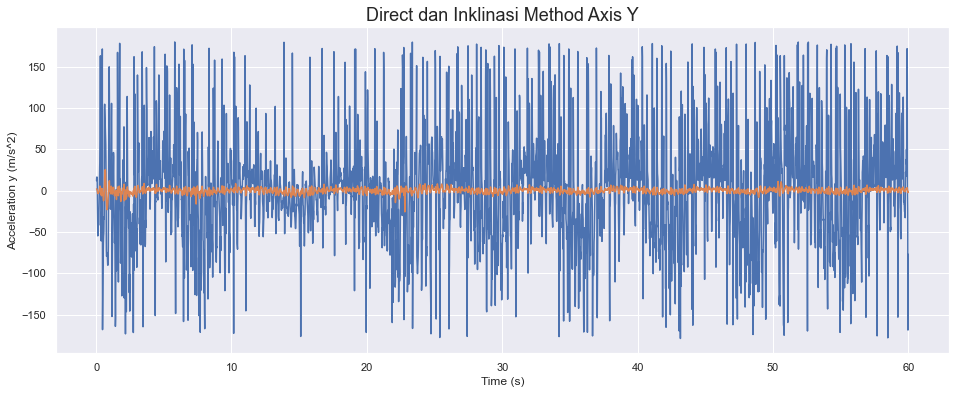

In [145]:
sns.lineplot(x=data['Time (s)'], y=ArctYZ)
sns.lineplot(x=data['Time (s)'], y=data['Linear Acceleration y (m/s^2)']* 180 / np.pi)
plt.ylabel("Acceleration y (m/s^2)")
plt.title("Direct dan Inklinasi Method Axis Y", size=18)
plt.show()

# Laju Pernafasan

## LPF
pada soal sudah dinyatakan bahwa nilai cutoff / noise adalah 0.8Hz dan sampling rate juga di set saat awal mengumpulkan data adalah 100Hz

In [99]:
from scipy.signal import butter,filtfilt

def lowpassfilter(data,cutoff,samplingFreq,order=5):
    '''
    retunr a series of data in a numpy array format that as been applied
    a Low Pass Filter.
    parametes:
    data: an 1D array or a pandas series, type must be numerical
    cutoff: the Cut off value of the Low Pass Filter
    order: the order value of butter function

    this code is referencing this tutorial : https://youtu.be/BnEMtoyNFZQ
    '''
    nyq = 0.5 * samplingFreq # nyq adalah Nyquist frequency yang merupakan 1/2 dari nilai samppling rate, 
                             # detail lebih bisa di lihat disini https://en.wikipedia.org/wiki/Nyquist_frequency
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype="low")
    y = filtfilt(b, a, data)
    return y


In [147]:
ArctYZF = lowpassfilter(ArctYZ,0.8,100) # Hasil LPF pada Inklinasi Method
DirectYF = lowpassfilter(data['Linear Acceleration y (m/s^2)'],0.8,100) # Hasil LPF pada Inklinasi Method

## Plot hasil LPF

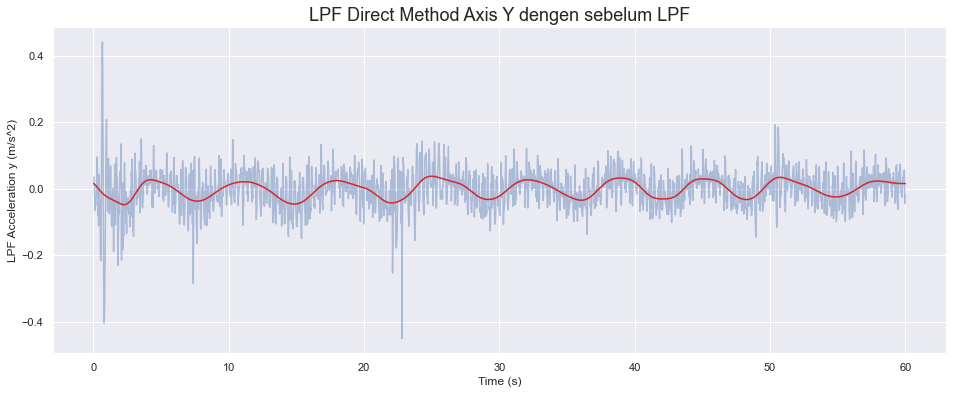

In [131]:
sns.lineplot(x=data['Time (s)'], y=data['Linear Acceleration y (m/s^2)'],alpha=0.4)
sns.lineplot(x=data['Time (s)'], y=DirectYF,color="tab:red")
plt.ylabel("LPF Acceleration y (m/s^2)")
plt.title("LPF Direct Method Axis Y dengen sebelum LPF", size=18)
plt.show()

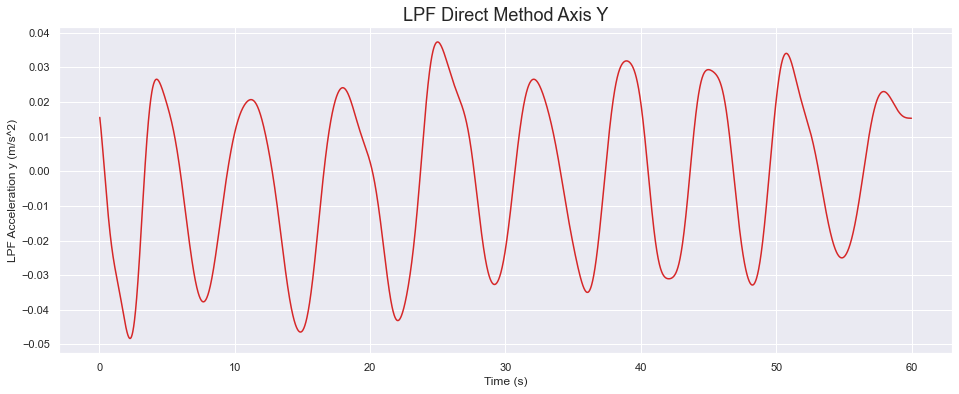

In [171]:
sns.lineplot(x=data['Time (s)'], y=DirectYF,color="tab:red")
plt.ylabel("LPF Acceleration y (m/s^2)")
plt.title("LPF Direct Method Axis Y", size=18)
plt.yticks(np.arange(-0.05,0.05,0.01))
plt.show()

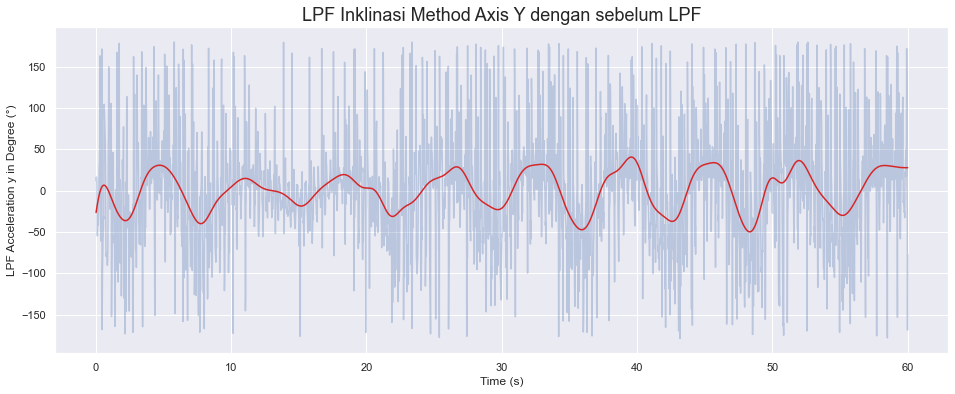

In [135]:
sns.lineplot(x=data['Time (s)'], y=ArctYZ,alpha=0.3)
sns.lineplot(x=data['Time (s)'], y=ArctYZF,color="tab:red")
plt.ylabel("LPF Acceleration y in Degree (°)")
plt.title("LPF Inklinasi Method Axis Y dengan sebelum LPF", size=18)
plt.show()

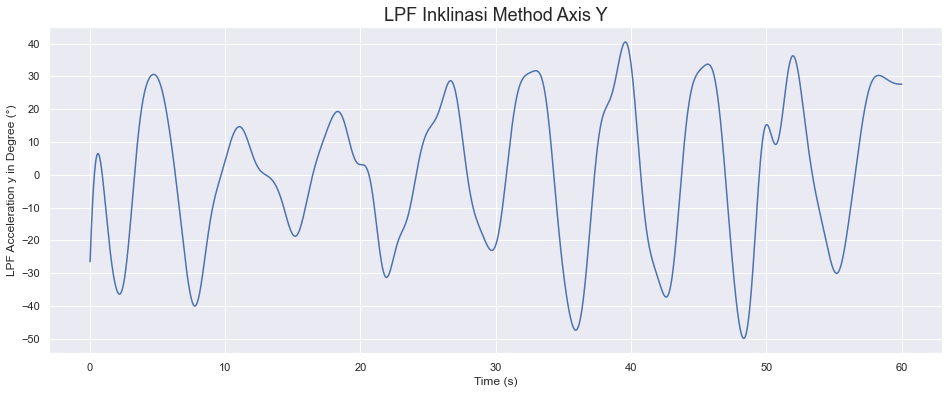

In [134]:
sns.lineplot(x=data['Time (s)'], y=ArctYZF)
plt.ylabel("LPF Acceleration y in Degree (°)")
plt.title("LPF Inklinasi Method Axis Y", size=18)
plt.yticks(np.arange(-50,50,10))
plt.show()

## Algoritma untuk mendeteksi peak / puncak

In [160]:
from scipy.signal import find_peaks

def cari_puncak(x):
    '''
    Mengembalikan indexs puncak pada signal x
    '''
    peaks, _ = find_peaks(x)
    return peaks

def jumlah_puncak(x):
    '''
    Mengembalikan jumlah puncak pada signal x
    '''
    peaks, _ = find_peaks(x)
    return len(peaks)

In [164]:
peaksI = cari_puncak(ArctYZF) # Puncak Inklinasi Method
peaksD = cari_puncak(DirectYF) # Puncak Direct Method

print("-"*40)
print("Jumlah Puncak di Inklinasi Method :", jumlah_puncak(ArctYZF))
print("Jumlah Puncak di Direct Method :", jumlah_puncak(DirectYF))

----------------------------------------
Jumlah Puncak di Inklinasi Method : 11
Jumlah Puncak di Direct Method : 9


## Plot Hasil Deteksi Puncak

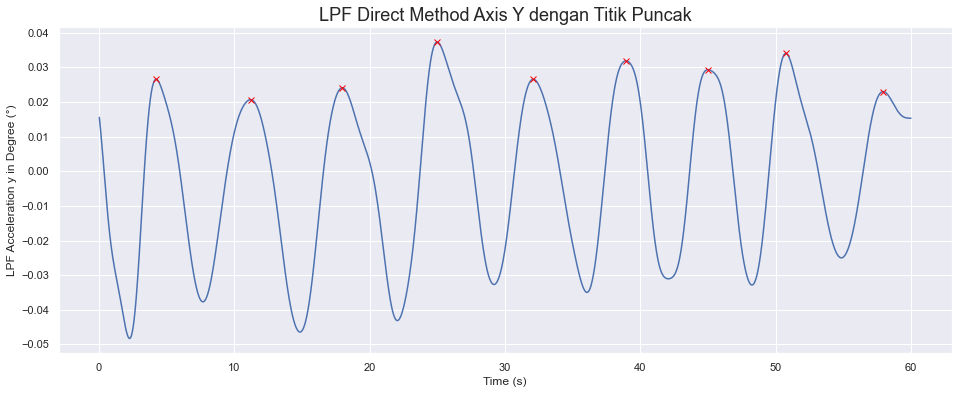

In [170]:
sns.lineplot(x=data['Time (s)'], y=DirectYF)
plt.plot(data['Time (s)'][peaksD],DirectYF[peaksD],'x',color="red")
plt.ylabel("LPF Acceleration y in Degree (°)")
plt.title("LPF Direct Method Axis Y dengan Titik Puncak", size=18)
plt.yticks(np.arange(-0.05,0.05,0.01))
plt.show()

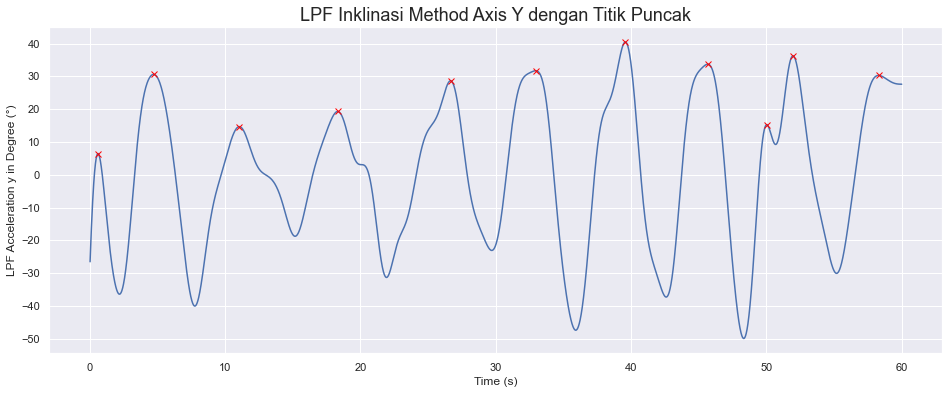

In [172]:
sns.lineplot(x=data['Time (s)'], y=ArctYZF)
plt.plot(data['Time (s)'][peaksI],ArctYZF[peaksI],'x',color="red")
plt.ylabel("LPF Acceleration y in Degree (°)")
plt.title("LPF Inklinasi Method Axis Y dengan Titik Puncak", size=18)
plt.yticks(np.arange(-50,50,10))
plt.show()